In [1]:
import json
import requests
from citipy import citipy
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import random
from config import api_key

In [2]:
plt.style.use("seaborn")

In [3]:
latRange = np.arange(-90,90,15)
lonRange = np.arange(-180,180,15)
cities_df = pd.DataFrame()
cities_df["Latitude"]=""
cities_df["Longitude"]=""

for x in latRange:
    for y in lonRange:
        x_values = list(np.arange(x,x+15,0.01))
        y_values = list(np.arange(y,y+15,0.01))
        lattitudes = random.sample(x_values,50)
        longitutes = random.sample(y_values,50)
        randomLats = [x+dec_lat for dec_lat in lattitudes]
        randomLons = [y+dec_lon for dec_lon in longitutes]
        cities_df = cities_df.append(pd.DataFrame.from_dict({"Latitude":randomLats,"Longitude":randomLons})) 
cities_df = cities_df.reset_index()
cities_df.head()

,index,Latitude,Longitude
0,0,-167.42,-351.00
1,1,-167.22,-356.24
2,2,-172.44,-347.07
3,3,-166.36,-353.02
4,4,-166.07,-353.43


In [11]:
cities_df["City name"] = ""
cities_df["Country code"] = ""
for index,row in cities_df.iterrows():
    city = citipy.nearest_city(row["Latitude"],row["Longitude"])
    cities_df.set_value(index,"City name",city.city_name)
    cities_df.set_value(index,"Country code",city.country_code)
clean_cities_df = cities_df.drop(['Latitude', 'Longitude'],axis=1)
clean_cities_df = clean_cities_df.drop_duplicates()
selected_cities = clean_cities_df.sample(500)
selected_cities = selected_cities.reset_index(drop=True)


In [12]:
base_url = "http://api.openweathermap.org/data/2.5/weather"
params = { "appid" :api_key,"units":"metric" }
def encrypt_key(input_url):
    return input_url[0:53]+api_key+input_url[85:]
for index,row in selected_cities.iterrows():
    params["q"] =f'{row["City name"]},{row["Country code"]}'
    print(f"Retrieving weather information for {params['q']}")
    city_weather_resp = requests.get(base_url,params)
    print(encrypt_key(city_weather_resp.url))
    city_weather_resp  = city_weather_resp.json()
    selected_cities.set_value(index,"Latitude",city_weather_resp.get("coord",{}).get("lat"))
    selected_cities.set_value(index,"Longitude",city_weather_resp.get("coord",{}).get("lon"))
    selected_cities.set_value(index,"Temperature",city_weather_resp.get("main",{}).get("temp_max"))
    selected_cities.set_value(index,"Wind speed",city_weather_resp.get("wind",{}).get("speed"))
    selected_cities.set_value(index,"Humidity",city_weather_resp.get("main",{}).get("humidity"))
    selected_cities.set_value(index,"Cloudiness",city_weather_resp.get("clouds",{}).get("all"))
selected_cities = selected_cities.dropna()
selected_cities.to_csv("City_Weather_data.csv")

Retrieving weather information for punta arenas,cl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=punta+arenas%2Ccl
Retrieving weather information for hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hobart%2Cau
Retrieving weather information for qaanaaq,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=qaanaaq%2Cgl
Retrieving weather information for sarangani,ph
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sarangani%2Cph
Retrieving weather information for dehui,cn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dehui%2Ccn
Retrieving weather information for waipawa,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=waipawa%2Cnz
Retrieving weather information f

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ballitoville%2Cza
Retrieving weather information for sakakah,sa
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sakakah%2Csa
Retrieving weather information for kolda,sn
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kolda%2Csn
Retrieving weather information for barentsburg,sj
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=barentsburg%2Csj
Retrieving weather information for bredasdorp,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bredasdorp%2Cza
Retrieving weather information for mizdah,ly
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mizdah%2Cly
Retrieving weather information for hermanus,za
http://api.openweathermap.

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=salym%2Cru
Retrieving weather information for bilibino,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=bilibino%2Cru
Retrieving weather information for hobart,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hobart%2Cau
Retrieving weather information for asau,tv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=asau%2Ctv
Retrieving weather information for taolanaro,mg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=taolanaro%2Cmg
Retrieving weather information for sao filipe,cv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=sao+filipe%2Ccv
Retrieving weather information for san patricio,mx
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=thohoyandou%2Cza
Retrieving weather information for lander,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=lander%2Cus
Retrieving weather information for cidreira,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=cidreira%2Cbr
Retrieving weather information for carnarvon,au
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=carnarvon%2Cau
Retrieving weather information for vardo,no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vardo%2Cno
Retrieving weather information for kaitangata,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kaitangata%2Cnz
Retrieving weather information for tolaga bay,nz
http://api.openweathermap.o

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=butaritari%2Cki
Retrieving weather information for kahului,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kahului%2Cus
Retrieving weather information for banda aceh,id
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=banda+aceh%2Cid
Retrieving weather information for east london,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=east+london%2Cza
Retrieving weather information for ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ushuaia%2Car
Retrieving weather information for ugoofaaru,mv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ugoofaaru%2Cmv
Retrieving weather information for mataura,pf
http://api.openweat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hit%2Ciq
Retrieving weather information for waipawa,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=waipawa%2Cnz
Retrieving weather information for luderitz,na
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=luderitz%2Cna
Retrieving weather information for georgetown,gy
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=georgetown%2Cgy
Retrieving weather information for halalo,wf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=halalo%2Cwf
Retrieving weather information for orbetello,it
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=orbetello%2Cit
Retrieving weather information for meulaboh,id
http://api.openweathermap.org/dat

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=omsukchan%2Cru
Retrieving weather information for illoqqortoormiut,gl
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=illoqqortoormiut%2Cgl
Retrieving weather information for kavieng,pg
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kavieng%2Cpg
Retrieving weather information for halalo,wf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=halalo%2Cwf
Retrieving weather information for dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dikson%2Cru
Retrieving weather information for kruisfontein,za
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kruisfontein%2Cza
Retrieving weather information for punta arenas,cl
http://ap

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=hobart%2Cau
Retrieving weather information for torit,sd
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=torit%2Csd
Retrieving weather information for mataura,pf
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mataura%2Cpf
Retrieving weather information for kaitangata,nz
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=kaitangata%2Cnz
Retrieving weather information for ushuaia,ar
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=ushuaia%2Car
Retrieving weather information for dikson,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=dikson%2Cru
Retrieving weather information for ponta delgada,pt
http://api.openweathermap.org/data/

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=gisborne%2Cnz
Retrieving weather information for caravelas,br
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=caravelas%2Cbr
Retrieving weather information for vila franca do campo,pt
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vila+franca+do+campo%2Cpt
Retrieving weather information for murgab,tm
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=murgab%2Ctm
Retrieving weather information for asau,tv
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=asau%2Ctv
Retrieving weather information for wauconda,us
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=wauconda%2Cus
Retrieving weather information for port elizabeth,za
http://a

http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=saint+george%2Cbm
Retrieving weather information for vardo,no
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=vardo%2Cno
Retrieving weather information for phalia,pk
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=phalia%2Cpk
Retrieving weather information for mys shmidta,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=mys+shmidta%2Cru
Retrieving weather information for yerbogachen,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=yerbogachen%2Cru
Retrieving weather information for verkhoyansk,ru
http://api.openweathermap.org/data/2.5/weather?appid=25bc90a1196e6f153eece0bc0b0fc9eb&units=metric&q=verkhoyansk%2Cru
Retrieving weather information for hami,cn
http://api.openweath

In [13]:
def set_plot_prop(x_title,x_lim,y_title):
    plt.title(f"{y_title} vs {x_title}")
    plt.ylabel(y_title)
    plt.xlabel(x_title)
    plt.grid(True)
    plt.xlim(x_lim)

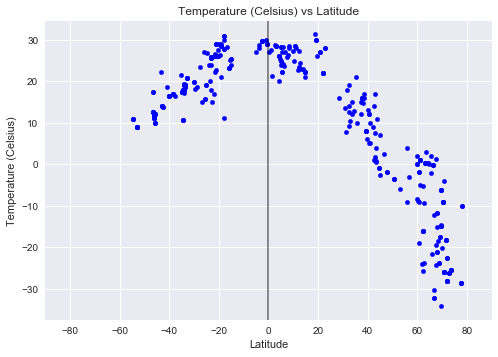

In [14]:
selected_cities.plot(kind="scatter",x="Latitude",y="Temperature",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Temperature (Celsius)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Temperature vs Latitude")
plt.show()

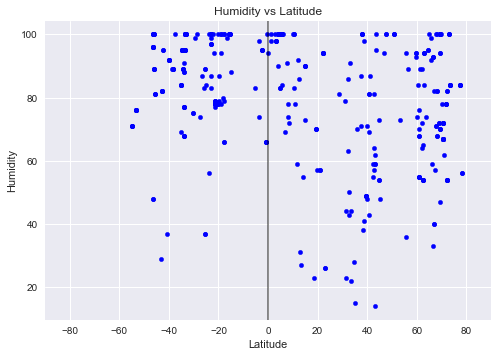

In [15]:
selected_cities.plot(kind="scatter",x="Latitude",y="Humidity",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Humidity")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Humidity vs Latitude")
plt.show()

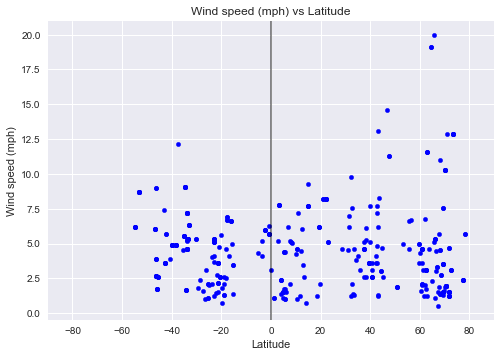

In [16]:
selected_cities["Wind speed"] = pd.to_numeric(selected_cities["Wind speed"])
selected_cities.plot(kind="scatter",x="Latitude",y="Wind speed",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Wind speed (mph)")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Wind speed vs Latitude")
plt.show()

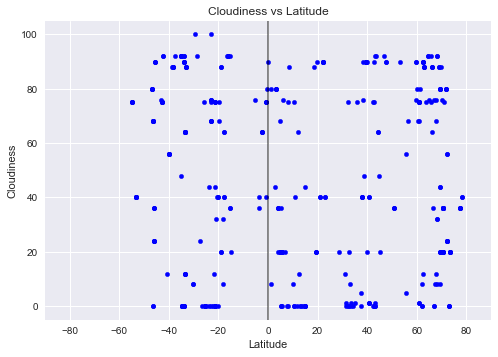

In [17]:
selected_cities["Cloudiness"] = pd.to_numeric(selected_cities["Cloudiness"])
selected_cities.plot(kind="scatter",x="Latitude",y="Cloudiness",grid=True,color="blue")
set_plot_prop("Latitude",[-90,90],"Cloudiness")
plt.axvline(0, color='black',alpha=0.5)
plt.savefig("Cloudiness vs Latitude")
plt.show()